In [70]:
import numpy as np
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [71]:
x_data=Variable(torch.tensor([[1.0],[2.0],[3.0],[4.0]]))  # this makes is 3*1,  only one feature, require grad default to false
y_data=Variable(torch.tensor([[0.0],[0.0],[1.0],[1.0]]))   #Variable:Wraps a tensor and records the operations applied to it
epochs=500

In [72]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()   #call in the init of the nn.Module
        self.fc1=torch.nn.Linear(1,1)  #one feature in, one feature out 1*1
        
    def forward(self,x):  
        
        y_pred=F.sigmoid(self.fc1(x))
        
        return y_pred
        

In [73]:
model=Model()

In [74]:
print(model.parameters)

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=1, out_features=1, bias=True)
)>


In [75]:
for parameter in model.parameters(): print((parameter[0]))   #initillizing it on its own

tensor([ 0.2741])
tensor(-0.3809)


In [76]:
list((model.parameters()))

[Parameter containing:
 tensor([[ 0.2741]]), Parameter containing:
 tensor([-0.3809])]

In [77]:
criterion=torch.nn.BCELoss(size_average=True)   #loss initilization, binary cross entropy
#optimizer=torch.optim.SGD(model.parameters(),lr=0.01)  #init SGD with initilized model.paramter  (w/ grad, weight and bias)
#optimizer=torch.optim.Adam(model.parameters(),lr=0.1)
#optimizer=torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.9)
optimizer=torch.optim.SGD(model.parameters(),lr=0.1)

#torch.optim will hold the current state and will update the parameters based on the computed gradients. iterable containing the parameters (Variable)

In [78]:
loss_=torch.tensor([])
for epoch in range(epochs):
    
    #for parameter in model.parameters(): print('epoch',epoch,parameter[0]) 
    y_pred=model(x_data)   #this automtically call forward
    loss=criterion(y_pred,y_data)
    
    
    tmp=torch.tensor([loss])
    loss_=torch.cat((loss_,tmp))
    optimizer.zero_grad()   #initilize gradient to zero before every step, to avoid accumulation ,zero off good for RNN
    loss.backward()         #calculate gradient
    optimizer.step()        #update parameter (weights)
    t0=torch.tensor([2.0])
    t1=torch.tensor([4.0])
    t2=torch.tensor([7.0])
    if(epoch%5==0): print('epoch:',epoch,'loss:',loss,'2.0',model.forward(t0),'4.0',model.forward(t1),'7.0',model.forward(t2))
    
    


epoch: 0 loss: tensor(0.5790) 2.0 tensor([ 0.5514]) 4.0 tensor([ 0.6902]) 7.0 tensor([ 0.8447])
epoch: 5 loss: tensor(0.5596) 2.0 tensor([ 0.5762]) 4.0 tensor([ 0.7413]) 7.0 tensor([ 0.8976])
epoch: 10 loss: tensor(0.5482) 2.0 tensor([ 0.5823]) 4.0 tensor([ 0.7620]) 7.0 tensor([ 0.9177])
epoch: 15 loss: tensor(0.5382) 2.0 tensor([ 0.5819]) 4.0 tensor([ 0.7727]) 7.0 tensor([ 0.9285])
epoch: 20 loss: tensor(0.5286) 2.0 tensor([ 0.5791]) 4.0 tensor([ 0.7798]) 7.0 tensor([ 0.9360])
epoch: 25 loss: tensor(0.5194) 2.0 tensor([ 0.5753]) 4.0 tensor([ 0.7853]) 7.0 tensor([ 0.9419])
epoch: 30 loss: tensor(0.5105) 2.0 tensor([ 0.5713]) 4.0 tensor([ 0.7902]) 7.0 tensor([ 0.9471])
epoch: 35 loss: tensor(0.5019) 2.0 tensor([ 0.5672]) 4.0 tensor([ 0.7948]) 7.0 tensor([ 0.9516])
epoch: 40 loss: tensor(0.4936) 2.0 tensor([ 0.5631]) 4.0 tensor([ 0.7992]) 7.0 tensor([ 0.9557])
epoch: 45 loss: tensor(0.4856) 2.0 tensor([ 0.5590]) 4.0 tensor([ 0.8034]) 7.0 tensor([ 0.9594])
epoch: 50 loss: tensor(0.4778) 2

In [48]:
for i,parameter in enumerate(model.parameters()):
    #print('w:',list(model.parameters()[0]),'bias:',list(model.parameters()[0])) 

    print(parameter[0])    
    

tensor([ 1.6053])
tensor(-3.6693)


In [51]:
loss_SGD_1=loss_

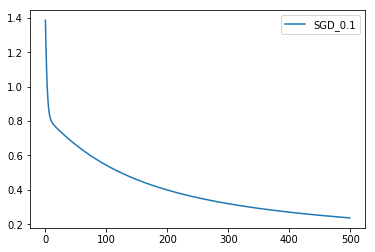

In [52]:

plt.plot(np.arange(0,epochs,1),loss_SGD_01.detach().numpy(),label='SGD_0.1')  #lr=0.01 #need to detach gradient for graph breakdown otherwise won't do numpy in the middle of graph (good for end of run)
#plt.plot(np.arange(0,epochs,1),loss_SGD_05.detach().numpy(),label='SGD_0.05') 
#plt.plot(np.arange(0,epochs,1),loss_sgd_mom.detach().numpy(),label='SGD_0.01_mom_0.9')   #lr=0.01 momentum=0.9
#plt.plot(np.arange(0,epochs,1),loss_Adam.detach().numpy(),label='Adam_0.1') #lr=0.1
#plt.xlim([-1,40])
plt.legend()
plt.show() 


#SGD w/o momentum look better in converging, than with momentum

In [421]:
test=torch.tensor([4.0])
model.forward(test).data[0]

tensor(7.7825)